In [12]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

# path = '../data/2/red_average.csv'
# file = pd.read_csv(path,encoding='utf-8')
path = '../data/2/white_sum.csv'
file = pd.read_csv(path, encoding='utf-8')
file.head()
new_file = file.iloc[:, 1:]
print(new_file.head())
x = new_file.values


https://blog.csdn.net/ruoff/article/details/116568680

(27, 11)


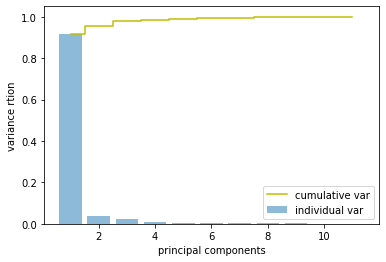

In [19]:
# // An highlighted block
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from numpy.linalg import eig
#matplotlib inline

iris = load_iris()
# X = iris.data
X=x
print(x.shape)
X = X - X.mean(axis = 0)

#计算协方差矩阵
X_cov = np.cov(X.T, ddof = 0)

#计算协方差矩阵的特征值和特征向量
eigenvalues,eigenvectors = eig(X_cov)

tot = sum(eigenvalues)
var_exp = [(i/tot) for i in sorted(eigenvalues, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,12), var_exp, alpha = 0.5, align = 'center', label = 'individual var')
plt.step(range(1,12), cum_var_exp, where = 'mid', color='y',label = 'cumulative var')
plt.ylabel('variance rtion')
plt.xlabel('principal components')
plt.legend(loc = 'best')
plt.show()
# 各特征值的贡献率如图所示，可以看出，前两个特征值的方差贡献率超过95%，所以k取3有其合理性。


In [20]:
# // 用python实现主成分分析（PCA）
import numpy as np
from numpy.linalg import eig
from sklearn.datasets import load_iris
def pca(X,k):
    X = X - X.mean(axis = 0) #向量X去中心化
    X_cov = np.cov(X.T, ddof = 0) #计算向量X的协方差矩阵，自由度可以选择0或1
    eigenvalues,eigenvectors = eig(X_cov) #计算协方差矩阵的特征值和特征向量
    klarge_index = eigenvalues.argsort()[-k:][::-1] #选取最大的K个特征值及其特征向量
    k_eigenvectors = eigenvectors[klarge_index] #用X与特征向量相乘
    return np.dot(X, k_eigenvectors.T)
iris = load_iris()
# X = iris.data
k = 3
X_pca = pca(X, k)
print(X_pca)


[[  6.04833943  -0.35880359   7.65375563]
 [ -5.36208453   2.66604699  -4.0379221 ]
 [  0.83575379  -1.19108665  -6.02463029]
 [  3.27237044  -0.37583704   0.19991711]
 [ 15.60257839   6.6795741   28.19221623]
 [ -1.09499957  -5.6797371   -5.86041835]
 [ -9.22180923  -0.12942202  -7.7437101 ]
 [-15.38024958   0.26098805 -23.33860986]
 [  7.71556161  10.80039673  27.05293745]
 [ 11.94953245  -4.13659734  16.68866785]
 [-12.87053858  -7.93347862 -30.31956076]
 [-14.37248533   4.70981743 -18.31377368]
 [ -5.03997875  -7.28167854 -13.6905611 ]
 [  1.91066455  -2.0426079    2.10707464]
 [  5.51373629   2.60399189  11.11617486]
 [-23.5011954  -18.77060673 -53.80366337]
 [ 13.71951394   0.55507809  19.5158353 ]
 [ -0.32159187  -3.5943409   -0.24092069]
 [  1.77557392  -0.46089649  -0.16357847]
 [  0.75496988   2.15443947   5.5123172 ]
 [  7.71949931   1.44844143  16.01380958]
 [  7.23270103   9.23431311  18.468994  ]
 [  0.51886706   2.86183453   4.92066319]
 [ -1.01769995  -3.63291947  -2.79